In [61]:
import pandas as pd
import numpy as np
from fancyimpute import knn

In [26]:
data=pd.read_csv('train.csv')

In [18]:
import seaborn as sns

In [19]:
data.shape

(1460, 81)

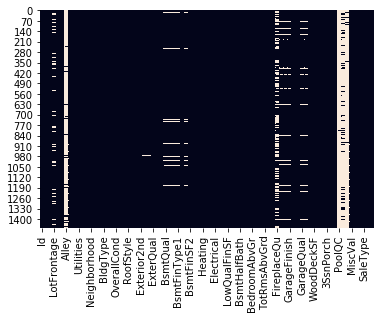

In [20]:
sns.heatmap(data.isnull(),cbar=False)

In [28]:
data.dropna(thresh=.4*len(data),axis=1,inplace=True)

In [29]:
data.shape

(1460, 77)

In [52]:
import itertools

In [53]:
to_remove_row=[]
for item in data.columns:
    if data[item].isnull().sum()>0 and data[item].isnull().sum()<.01*len(data):
        to_remove_row.append(list(data[data[item].isnull()].index))
        
#to_remove_row=set(to_remove_row)
to_remove_row = list(itertools.chain(*to_remove_row)) # the list received list of lists, hence needs to be expanded
to_remove_row=set(to_remove_row) # made set of the list containing the index to obtain unique elements

len(to_remove_row)

9

In [56]:
data.drop(index=to_remove_row,inplace=True)

In [57]:
data.select_dtypes(include=np.number).isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      257
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [58]:
data.select_dtypes(include=object).isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      685
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [59]:
# Applying knn imputation in continuous data

In [67]:
numdata=data.select_dtypes(include=np.number)
numdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 38 columns):
Id               1451 non-null int64
MSSubClass       1451 non-null int64
LotFrontage      1194 non-null float64
LotArea          1451 non-null int64
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
MasVnrArea       1451 non-null float64
BsmtFinSF1       1451 non-null int64
BsmtFinSF2       1451 non-null int64
BsmtUnfSF        1451 non-null int64
TotalBsmtSF      1451 non-null int64
1stFlrSF         1451 non-null int64
2ndFlrSF         1451 non-null int64
LowQualFinSF     1451 non-null int64
GrLivArea        1451 non-null int64
BsmtFullBath     1451 non-null int64
BsmtHalfBath     1451 non-null int64
FullBath         1451 non-null int64
HalfBath         1451 non-null int64
BedroomAbvGr     1451 non-null int64
KitchenAbvGr     1451 non-null int64
TotRmsAbvGrd     1451 non-null int64
F

In [77]:
from fancyimpute import KNN
#We use the train dataframe from Titanic dataset
#fancy impute removes column names.
data_cols = list(numdata)
# Use 5 nearest rows which have a feature to fill in each row's
numdata = pd.DataFrame(KNN(k=5).fit_transform(numdata))
numdata.columns = data_cols

Imputing row 1/1451 with 0 missing, elapsed time: 1.500
Imputing row 101/1451 with 1 missing, elapsed time: 1.500
Imputing row 201/1451 with 0 missing, elapsed time: 1.500
Imputing row 301/1451 with 0 missing, elapsed time: 1.516
Imputing row 401/1451 with 0 missing, elapsed time: 1.516
Imputing row 501/1451 with 0 missing, elapsed time: 1.516
Imputing row 601/1451 with 0 missing, elapsed time: 1.516
Imputing row 701/1451 with 0 missing, elapsed time: 1.516
Imputing row 801/1451 with 0 missing, elapsed time: 1.531
Imputing row 901/1451 with 0 missing, elapsed time: 1.531
Imputing row 1001/1451 with 1 missing, elapsed time: 1.531
Imputing row 1101/1451 with 0 missing, elapsed time: 1.531
Imputing row 1201/1451 with 1 missing, elapsed time: 1.531
Imputing row 1301/1451 with 0 missing, elapsed time: 1.547
Imputing row 1401/1451 with 0 missing, elapsed time: 1.547


In [78]:
numdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 38 columns):
Id               1451 non-null float64
MSSubClass       1451 non-null float64
LotFrontage      1451 non-null float64
LotArea          1451 non-null float64
OverallQual      1451 non-null float64
OverallCond      1451 non-null float64
YearBuilt        1451 non-null float64
YearRemodAdd     1451 non-null float64
MasVnrArea       1451 non-null float64
BsmtFinSF1       1451 non-null float64
BsmtFinSF2       1451 non-null float64
BsmtUnfSF        1451 non-null float64
TotalBsmtSF      1451 non-null float64
1stFlrSF         1451 non-null float64
2ndFlrSF         1451 non-null float64
LowQualFinSF     1451 non-null float64
GrLivArea        1451 non-null float64
BsmtFullBath     1451 non-null float64
BsmtHalfBath     1451 non-null float64
FullBath         1451 non-null float64
HalfBath         1451 non-null float64
BedroomAbvGr     1451 non-null float64
KitchenAbvGr     1451 non-null floa

In [ ]:
# Handling the categorical features.

In [271]:
catdata=data.select_dtypes(include=object)

In [206]:
#catdata.isnull().sum()

In [85]:
# Checking the nature of the category with misssing values to see if it is meaningful gto impute them because suppose
#we have a category called room number. We cannot impute the room no.

In [90]:
# Here we don't have such scenario. So we are good to impute.

# Visualizing the frequency of classes in a category

In [123]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'GarageType')

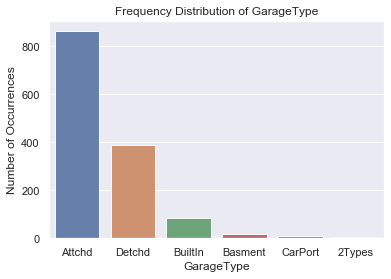

In [207]:
class_count = catdata['GarageType'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of GarageType')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('GarageType', fontsize=12)


([<matplotlib.patches.Wedge at 0x1c9d6973630>,
 [Text(-0.43663108146297175, 1.0096302782209317, 'Attchd'),
  Text(0.1458707908776298, -1.0902851518610785, 'Detchd'),
  Text(1.0321195087029844, -0.3804330686923918, 'BuiltIn'),
  Text(1.0930632252391936, -0.12334012173535464, 'Basment'),
  Text(1.0987247992523412, -0.052951067108252266, 'CarPort'),
  Text(1.0998958819532374, -0.01513436032048245, '2Types')],
 [Text(-0.23816240807071185, 0.5507074244841444, '63.0%'),
  Text(0.0795658859332526, -0.5947009919242245, '28.2%'),
  Text(0.5629742774743551, -0.2075089465594864, '6.3%'),
  Text(0.5962163046759237, -0.06727643003746615, '1.4%'),
  Text(0.5993044359558225, -0.028882400240864865, '0.7%'),
  Text(0.5999432083381294, -0.008255105629354062, '0.4%')])

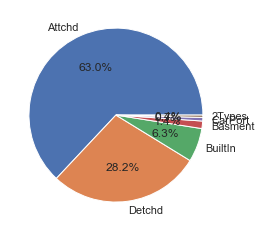

In [208]:
labels=catdata['GarageType'].value_counts().index.tolist()

counts=catdata['GarageType'].value_counts()

#counts[Attchd] gives the value
sizes=[counts[var_cat] for var_cat in labels]



fig1,ax1=plt.subplots()

ax1.pie(sizes,labels=labels,autopct='%1.1f%%',labeldistance=1.1)

In [272]:

for item in catdata.columns:
    if catdata[item].isnull().sum() > 0:
        #print(catdata[item].value_counts() )
        if catdata[item].value_counts()[0] > 1300:
            catdata[item].fillna(catdata[item].value_counts().index[0],inplace=True)
        

In [210]:
catdata.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond           0
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      685
GarageType        81
GarageFinish      81
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [249]:
# Using KNN for imputation of the rest of the categorical missing values

In [200]:
from sklearn.preprocessing import OrdinalEncoder

In [273]:
import warnings
warnings.filterwarnings('ignore')
Ordinal_encoder_dict={}
for item in list(catdata.columns):
    
    item_not_null=catdata[item][catdata[item].notnull()]



    item_not_null=item_not_null.values.reshape(-1,1)
    Ordinal_encoder_dict[item]=OrdinalEncoder()

    

    

    encoded_val=Ordinal_encoder_dict[item].fit_transform(item_not_null)

    catdata.loc[catdata[item].notnull(),item]=np.squeeze(encoded_val)
    

In [234]:
#catdata[list(catdata.columns[catdata.isnull().any()])]  Encoding successfull

In [274]:
KNN_imputer=KNN()

In [275]:
catdata_col=list(catdata)
catdata=pd.DataFrame(np.round(KNN_imputer.fit_transform(catdata)))
catdata.columns=catdata_col

Imputing row 1/1451 with 1 missing, elapsed time: 1.616
Imputing row 101/1451 with 0 missing, elapsed time: 1.624
Imputing row 201/1451 with 1 missing, elapsed time: 1.632
Imputing row 301/1451 with 0 missing, elapsed time: 1.636
Imputing row 401/1451 with 0 missing, elapsed time: 1.644
Imputing row 501/1451 with 1 missing, elapsed time: 1.648
Imputing row 601/1451 with 0 missing, elapsed time: 1.656
Imputing row 701/1451 with 0 missing, elapsed time: 1.664
Imputing row 801/1451 with 0 missing, elapsed time: 1.672
Imputing row 901/1451 with 0 missing, elapsed time: 1.680
Imputing row 1001/1451 with 0 missing, elapsed time: 1.688
Imputing row 1101/1451 with 0 missing, elapsed time: 1.696
Imputing row 1201/1451 with 1 missing, elapsed time: 1.704
Imputing row 1301/1451 with 1 missing, elapsed time: 1.712
Imputing row 1401/1451 with 0 missing, elapsed time: 1.716


In [276]:
for item in list(catdata.columns):
    reshaped_col=catdata[item].values.reshape(-1,1)
    catdata[item]=Ordinal_encoder_dict[item].inverse_transform(reshaped_col)

In [278]:
catdata.isnull().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

In [279]:
# Imputation for numerical data

In [280]:
num_data=data.select_dtypes(include=np.number)

In [281]:
num_col=list(num_data)
numdata=pd.DataFrame(KNN(5).fit_transform(num_data))
numdata.columns=num_col

Imputing row 1/1451 with 0 missing, elapsed time: 1.638
Imputing row 101/1451 with 1 missing, elapsed time: 1.642
Imputing row 201/1451 with 0 missing, elapsed time: 1.650
Imputing row 301/1451 with 0 missing, elapsed time: 1.654
Imputing row 401/1451 with 0 missing, elapsed time: 1.658
Imputing row 501/1451 with 0 missing, elapsed time: 1.662
Imputing row 601/1451 with 0 missing, elapsed time: 1.666
Imputing row 701/1451 with 0 missing, elapsed time: 1.674
Imputing row 801/1451 with 0 missing, elapsed time: 1.678
Imputing row 901/1451 with 0 missing, elapsed time: 1.682
Imputing row 1001/1451 with 1 missing, elapsed time: 1.686
Imputing row 1101/1451 with 0 missing, elapsed time: 1.690
Imputing row 1201/1451 with 1 missing, elapsed time: 1.694
Imputing row 1301/1451 with 0 missing, elapsed time: 1.698
Imputing row 1401/1451 with 0 missing, elapsed time: 1.702


In [282]:
numdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 38 columns):
Id               1451 non-null float64
MSSubClass       1451 non-null float64
LotFrontage      1451 non-null float64
LotArea          1451 non-null float64
OverallQual      1451 non-null float64
OverallCond      1451 non-null float64
YearBuilt        1451 non-null float64
YearRemodAdd     1451 non-null float64
MasVnrArea       1451 non-null float64
BsmtFinSF1       1451 non-null float64
BsmtFinSF2       1451 non-null float64
BsmtUnfSF        1451 non-null float64
TotalBsmtSF      1451 non-null float64
1stFlrSF         1451 non-null float64
2ndFlrSF         1451 non-null float64
LowQualFinSF     1451 non-null float64
GrLivArea        1451 non-null float64
BsmtFullBath     1451 non-null float64
BsmtHalfBath     1451 non-null float64
FullBath         1451 non-null float64
HalfBath         1451 non-null float64
BedroomAbvGr     1451 non-null float64
KitchenAbvGr     1451 non-null floa

In [301]:
categorical_mask = (data.dtypes==object)

In [302]:
categorical_columns = data.columns[categorical_mask].tolist()

In [303]:
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [304]:
from sklearn.feature_extraction import DictVectorizer

In [305]:
data.to_dict("records")

[{'Id': 1,
  'MSSubClass': 60,
  'MSZoning': 'RL',
  'LotFrontage': 65.0,
  'LotArea': 8450,
  'Street': 'Pave',
  'LotShape': 'Reg',
  'LandContour': 'Lvl',
  'Utilities': 'AllPub',
  'LotConfig': 'Inside',
  'LandSlope': 'Gtl',
  'Neighborhood': 'CollgCr',
  'Condition1': 'Norm',
  'Condition2': 'Norm',
  'BldgType': '1Fam',
  'HouseStyle': '2Story',
  'OverallQual': 7,
  'OverallCond': 5,
  'YearBuilt': 2003,
  'YearRemodAdd': 2003,
  'RoofStyle': 'Gable',
  'RoofMatl': 'CompShg',
  'Exterior1st': 'VinylSd',
  'Exterior2nd': 'VinylSd',
  'MasVnrType': 'BrkFace',
  'MasVnrArea': 196.0,
  'ExterQual': 'Gd',
  'ExterCond': 'TA',
  'Foundation': 'PConc',
  'BsmtQual': 'Gd',
  'BsmtCond': 'TA',
  'BsmtExposure': 'No',
  'BsmtFinType1': 'GLQ',
  'BsmtFinSF1': 706,
  'BsmtFinType2': 'Unf',
  'BsmtFinSF2': 0,
  'BsmtUnfSF': 150,
  'TotalBsmtSF': 856,
  'Heating': 'GasA',
  'HeatingQC': 'Ex',
  'CentralAir': 'Y',
  'Electrical': 'SBrkr',
  '1stFlrSF': 856,
  '2ndFlrSF': 854,
  'LowQualFinSF'